In [28]:
import json
import re
import pandas as pd
from pandas.io.json import json_normalize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cinthya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:

with open('result_chats_users.json', encoding='utf8') as f:
    data= json.load(f)
#print ( type(data))
     
#print(data )

In [4]:
#print((data)) #dict
# for key in data:
#     print (key, ':', data[key])

In [167]:
#print(type(data['messages'])) class list

In [5]:

# for element in data['messages']:
#     print(element)


In [17]:
#list comprehension

#messages=data['messages']
#df=pd.DataFrame([(d['date'],d['text']) for d in messages], columns=['date', 'text'])
#print(messages)

TypeError: 'DataFrame' object is not callable

In [6]:
df = pd.json_normalize(data, 'messages')
#print(df)

        id     type                 date date_unixtime  \
0        1  service  2019-02-01T09:56:11    1549011371   
1        2  service  2019-02-01T10:04:11    1549011851   
2        3  message  2019-02-14T09:01:38    1550131298   
3        4  message  2019-02-14T09:02:01    1550131321   
4        8  service  2019-02-18T18:35:00    1550511300   
...    ...      ...                  ...           ...   
4513  5213  message  2022-12-06T01:51:47    1670287907   
4514  5214  message  2022-12-06T01:53:37    1670288017   
4515  5215  message  2022-12-06T01:58:49    1670288329   
4516  5216  message  2022-12-06T01:58:55    1670288335   
4517  5217  message  2022-12-06T18:30:25    1670347825   

                                               actor           actor_id  \
0     Microdosing Discussion - Microdose-journey.com  channel1397559494   
1                                         Chi Nguyen      user522926401   
2                                                NaN                NaN   
3  

In [7]:
print(df.columns)

Index(['id', 'type', 'date', 'date_unixtime', 'actor', 'actor_id', 'action',
       'title', 'text', 'text_entities', 'photo', 'width', 'height', 'from',
       'from_id', 'members', 'edited', 'edited_unixtime', 'message_id',
       'reply_to_message_id', 'file', 'thumbnail', 'media_type',
       'sticker_emoji', 'mime_type', 'duration_seconds', 'via_bot',
       'forwarded_from', 'poll.question', 'poll.closed', 'poll.total_voters',
       'poll.answers'],
      dtype='object')


In [8]:
df_new=df[['date','text']]
print(df_new)

                     date                                               text
0     2019-02-01T09:56:11                                                   
1     2019-02-01T10:04:11                                                   
2     2019-02-14T09:01:38                                           Hello :)
3     2019-02-14T09:02:01  Please post any questions or experiences regar...
4     2019-02-18T18:35:00                                                   
...                   ...                                                ...
4513  2022-12-06T01:51:47                                   Hello fine folks
4514  2022-12-06T01:53:37  We share common interests I live in the states...
4515  2022-12-06T01:58:49  Is anyone in this group from 1pd 😅\n\nOr is th...
4516  2022-12-06T01:58:55                                                *md
4517  2022-12-06T18:30:25                                                 Md

[4518 rows x 2 columns]


In [25]:
df_new['words'] = df_new['text'].str.split()
#creating column words
display(df_new)

C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\965609293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['words'] = df_new['text'].str.split()


,date,text,words,1plsd,year_month
0,2019-02-01 09:56:11,,[],0,2019-02
1,2019-02-01 10:04:11,,[],0,2019-02
2,2019-02-14 09:01:38,Hello :),"[Hello, :)]",0,2019-02
3,2019-02-14 09:02:01,Please post any questions or experiences regar...,"[Please, post, any, questions, or, experiences...",0,2019-02
4,2019-02-18 18:35:00,,[],0,2019-02
...,...,...,...,...,...
4513,2022-12-06 01:51:47,Hello fine folks,"[Hello, fine, folks]",0,2022-12
4514,2022-12-06 01:53:37,We share common interests I live in the states...,"[We, share, common, interests, I, live, in, th...",0,2022-12
4515,2022-12-06 01:58:49,Is anyone in this group from 1pd 😅\n\nOr is th...,"[Is, anyone, in, this, group, from, 1pd, 😅, Or...",0,2022-12
4516,2022-12-06 01:58:55,*md,[*md],0,2022-12


In [88]:
#search_word = 'Hello[,]?'
#df_new['cntr'] = df_new['words'].str.contains(search_word, flags=re.IGNORECASE)
df_new['words'] = df_new['words'].astype(str) # it didnt work with counting words cuz some of the words in words column were float
#but after this code they all are strings and can be counted

df_new['1PD'] = df_new['words'].apply(lambda x: x.count('1PD'))
drug_mentions = df_new.groupby('year_month').sum()
#import seaborn as sns
#sns.lineplot(data=df_new, x='year_month', y='1plsd')
display(drug_mentions)

C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\2434280867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['words'] = df_new['words'].astype(str) # it didnt work with counting words cuz some of the words in words column were float
C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\2434280867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['1PD'] = df_new['words'].apply(lambda x: x.count('1PD'))


,1plsd,1PD
year_month,,
2019-02,2,2
2019-03,16,16
2019-04,11,11
2019-05,5,5
2019-06,3,3
2019-07,1,1
2019-08,0,0
2019-09,0,0
2019-10,0,0


In [90]:
df_new['quarter'] = df_new['date'].dt.to_period('Q')

C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\3997690663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['quarter'] = df_new['date'].dt.to_period('Q')


C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\3952168124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['quarter']=df_new['quarter'].astype(str)
C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\3952168124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['year_month'] = df_new['year_month'].astype(str)


<AxesSubplot:xlabel='quarter', ylabel='1PD'>

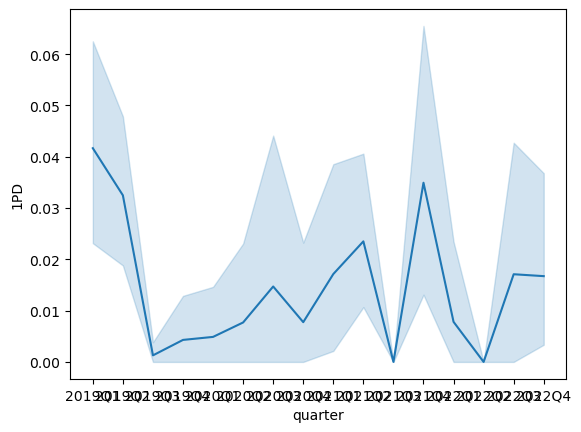

In [93]:

df_new['quarter']=df_new['quarter'].astype(str)
df_new['year_month'] = df_new['year_month'].astype(str)
sns.lineplot(data=df_new, x='quarter', y='1PD')


In [49]:
#df = pd.DataFrame({'date': ['2020-01-01', '2021-02-01', '2022-03-01']})



# Convert the date column to datetime format
df_new['date'] = pd.to_datetime(df_new['date'],format='%Y-%m-%dT%H:%M:%S')

# Convert the datetime column to "year-month" format
df_new['year_month'] = df_new['date'].dt.to_period('M')
#df_new['year_month'] = pd.to_numeric(df_new['year_month'])
#print(df)

display(df_new)

C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\3426653600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['date'] = pd.to_datetime(df_new['date'],format='%Y-%m-%dT%H:%M:%S')
C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\3426653600.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['year_month'] = df_new['date'].dt.to_period('M')


,date,text,words,1plsd,year_month,word_count
0,2019-02-01 09:56:11,,[],0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
1,2019-02-01 10:04:11,,[],0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
2,2019-02-14 09:01:38,Hello :),"['Hello', ':)']",0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
3,2019-02-14 09:02:01,Please post any questions or experiences regar...,"['Please', 'post', 'any', 'questions', 'or', '...",0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
4,2019-02-18 18:35:00,,[],0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
...,...,...,...,...,...,...
4513,2022-12-06 01:51:47,Hello fine folks,"['Hello', 'fine', 'folks']",0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
4514,2022-12-06 01:53:37,We share common interests I live in the states...,"['We', 'share', 'common', 'interests', 'I', 'l...",0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
4515,2022-12-06 01:58:49,Is anyone in this group from 1pd 😅\n\nOr is th...,"['Is', 'anyone', 'in', 'this', 'group', 'from'...",0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."
4516,2022-12-06 01:58:55,*md,['*md'],0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0..."


In [79]:
# { 3-MMC : [3-mmc, 3 MMC, 3MMC, 3mmc] }

#test_list = ['4-FA','4-FMA', '3-MMC', '4-MMC', '6-APB', 'DMT', 'Etizolam', '1P-LSD', '5-MeO-DMT', 'O-DSMT', '2-CB-FLY', '2F-DCK','3-CMC', 'Fenibut']
#test_list = ['1B-LSD', '1D-LSD', '1P-LSD', '1V-LSD', '1CP-AL-LAD', '1CP-LSD', '1CP-MIPLA', '2+3-FEA', '2-CB', '2-FA', '2-FDCK', '2-FEA', '2-FMA', '2-FPM', '2-MMC', '2/3-FEA', '2C-B-FLY', '2C-C', '2C-D', '2C-E', '2C-E-NBOME', '2F-DCK', '2F-KETAMINE', '3-CEC', '3-CMC', '3-CPM', '3-FA', '3-FEA', '3-FMA', '3-FPM', '3-HO-PCE', '3-HO-PCP', '3-MEC', '3-MEO-PCE', '3-MMA', '3-MMC', '3-ME-PCE', '3-ME-PCP', '3-ME-PCPY', '3-MEO-PCP', '3.4-DMMC', '3D-MXE', '4-ACO-MET', '4-ACO-DET', '4-ACO-DPT', '4-ACO-MIPT', '4-CDC', '4-CEC', '4-CL-PVP', '4-CMC', '4-EMC', '4-FMA', '4-FMPH', '4-HO-DET', '4-HO-DPT', '4-HO-EPT', '4-HO-MALT', '4-HO-MET', '4-HO-MIPT', '4-HO-MCPT', '4-ME-MABP', '4-MEC', '4-MPD', '4-MPM', '4B-MAR', '4C-MAR', '4F-ADB', '4F-AMB', '4F-MAR', '4F-MDMB-2201', '4F-MPH', '4F-METHYLFENIDAAT', '4F-RITALIN', '4FMA', '5-APB', '5-BR-DMT', '5-BROMO-DMT', '5-CL-ADB-A', '5-DBFPV', '5-EAPB', '5-HTP', '5-MAPB', '5-MEO-DALT', '5-MEO-DIPT', '5-MEO-MIPT', '5-MMPA', '5-MEO-DMT', '5-MEO-MET', '5-METHYLETHYLONE', '5BR-ADB-INACA', '5F-ADB', '5F-MDMB-2201', '5F-PCN', '5F-SGT-151', '6-APB', '6-CL-ADB-A', '6-CL-ADBA', '7-ABF', '7-ADD', 'A-PCYP', 'A-PHP', 'A-PIHP', 'ADB', 'ADB-BUTINACA', 'AL-LAD', 'ALD-52', 'AMT', 'BB-8', 'BK-2C-B', 'BK-BBDP', 'BK-EBDP', 'BOH-2C-B', 'BROMAZOLAM', 'BROMONORDIAZEPAM', 'CBD', 'CLONAZOLAM', 'DC-C', 'DC-TROPA-MIX', 'DCK', 'DESOXY-MDA', 'DESOXY-MDMA', 'DHM', 'DMC', 'DMXE', 'DOC', 'DPT', 'DESCHCLOROKETAMINE', 'DESCHLOROKETAMINE', 'DESCHLOROETIZOLAM', 'DICLAZEPAM', 'ED-DB', 'EPT', 'ETH-LAD', 'ETHYL-HEX', 'ETHYL-PENTEDRONE', 'ETIZOLAM', 'FLUALPRAZOLAM', 'FLUBROMAZEPAM', 'FLUBROMAZOLAM', 'FLUBROTIZOLAM', 'FLUETIZOLAM', 'FLUNITRAZOLAM', 'FLUOREXETAMINE', 'GW-0742', 'GW-501516', 'GIDAZEPAM', 'HEP', 'HEX-EN', 'HXE', 'IDRA-21', 'JWH-210', 'L-THEANINE', 'LGD-4033', 'LSD', 'LSZ', 'MD-PHP', 'MDPHP', 'MEAI', 'MET', 'MF-PVP', 'MK-2866', 'MK-677', 'MXPR', 'MXIPR', 'MEPHEDRENE', 'METHALLYLESCALINE', 'N-ETHYL-HEXEDRONE', 'N-ETHYLHEXEDRONE', 'NB-5-MEO-DALT', 'NB-5-MEO-MIPT', 'NDH', 'NEP', 'NORFLURAZEPAM', 'O-DSMT', 'O-PCE', 'PHOSPHATIDYLSERINE', 'PYRAZOLAM', 'RAD-140', 'RAD-150', 'RIBOFLAVINE', 'S-23', 'S-4', 'SGT-152', 'SR-9009', 'SR-9011', 'SULBUTIAMINE', 'SYNTHACAINE', 'THC-C4', 'TRYPTAMINE', 'VINPOCETINE', 'YK-11', 'A-D2PV', 'BK-MDDMA', 'Α-PIHP', 'ΒOH-2C-B']
test_list = ['4-FA']
#, '6-APB', 'DMT', 'Etizolam', '1P-LSD', '5-MeO-DMT', 'O-DSMT', '2-CB-FLY', '2F-DCK','3-CMC', 'Fenibut'
#2+3-FEA en 2/3-FEA samenvoegen?
#nog meer toevoegen?

regular_dict = {}
for i in test_list:
    regular_dict.update({i : [i.lower(), i.replace('-', ' '), i.replace('-', ''), i.replace('-', '').lower()] })
print(regular_dict)
# items=list(regular_dict.items())
# new_dict=[{ 'value': value} for value in items]

   

{'4-FA': ['4-fa', '4 FA', '4FA', '4fa']}


In [48]:
#print(df_new)

In [58]:
# test_list = ['4-FA','4-FMA', '3-MMC', '4-MMC', '6-APB', 'DMT', 'Etizolam', '1P-LSD', '5-MeO-DMT', 'O-DSMT', '2-CB-FLY', '2F-DCK','3-CMC', 'Fenibut']

# regular_dict = {}
# for i in test_list:
#     regular_dict.update({i : [i.lower(), i.replace('-', ' '), i.replace('-', ''), i.replace('-', '').lower()] })
# print(regular_dict)

In [80]:
def count_words(row, regular_dict):
    word_count={}
    for key, words in regular_dict.items():
        word_count[key] = sum(row.count(word) for word in words)
    return word_count

df_new['word_count'] = df_new['words'].apply(lambda x: count_words(x, regular_dict))

C:\Users\Cinthya\AppData\Local\Temp\ipykernel_24092\1158841257.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['word_count'] = df_new['words'].apply(lambda x: count_words(x, regular_dict))


In [81]:
word_count_grouped = df_new.groupby('year_month')['word_count'].apply(lambda x: x.tolist())
#display(df_new_grouped)  # aqui me salen todos los comments uno por uno.. tonces encontrar la manera de mostrar un numero por todos
display(word_count_grouped)
word_count_grouped.to_csv('word_count_grouped.csv', sep='\t', index=False, header=True)

year_month
2019-02    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-03    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-04    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-05    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-06    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-07    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-08    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-09    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-10    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2019-11                           [{'4-FA': 0}, {'4-FA': 0}]
2019-12    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2020-01    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2020-02    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2020-03    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2020-04    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2020-05    [{'4-FA': 0}, {'4-FA': 0}, {'4-FA': 0}, {'4-FA...
2020-06    [{

In [260]:
#df_new['word_count'] = df_new['words'].str.len()
#para contar all the words in one row

C:\Users\Cinthya\AppData\Local\Temp\ipykernel_8580\2324858035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['word_count'] = df_new['words'].str.len()


In [69]:
#print(df_new)
display(df_new)

,date,text,words,1plsd,year_month,word_count
0,2019-02-01 09:56:11,,[],0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
1,2019-02-01 10:04:11,,[],0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
2,2019-02-14 09:01:38,Hello :),"['Hello', ':)']",0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
3,2019-02-14 09:02:01,Please post any questions or experiences regar...,"['Please', 'post', 'any', 'questions', 'or', '...",0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
4,2019-02-18 18:35:00,,[],0,2019-02,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
...,...,...,...,...,...,...
4513,2022-12-06 01:51:47,Hello fine folks,"['Hello', 'fine', 'folks']",0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
4514,2022-12-06 01:53:37,We share common interests I live in the states...,"['We', 'share', 'common', 'interests', 'I', 'l...",0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
4515,2022-12-06 01:58:49,Is anyone in this group from 1pd 😅\n\nOr is th...,"['Is', 'anyone', 'in', 'this', 'group', 'from'...",0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"
4516,2022-12-06 01:58:55,*md,['*md'],0,2022-12,"{'4-FA': 0, '4-FMA': 0, '3-MMC': 0, '4-MMC': 0}"


In [82]:
word_count=df_new['word_count']
word_count.to_csv('word_count.csv', sep='\t', index=False, header=True)


In [ ]:

# Convert the list to uppercase
new_list = []
for element in new_text:
    if isinstance(element, str):
        # Convert string to uppercase
            element = element.upper()
   
    elif isinstance(element, dict):
        # Convert dictionary keys and values to uppercase
        element = {k.upper(): v.upper() for k, v in element.items()}
    # Add the element to the new list
    elif isinstance(element, list):
         # Convert list elements to uppercase
        if isinstance(element, str):
        # Convert string to uppercase
            element = element.upper()
        elif isinstance(element, dict):
        # Convert dictionary keys and values to uppercase
            element = {k.upper(): v.upper() for k, v in element.items()}
        new_list.append(element)
    new_list.append(element)

print(new_list)  # Output: ['APPLE', 'BANANA', ['CHERRY', 'PEAR'], {'NAME': 'ORANGE'}]


In [ ]:

# for element in new_list:
#     print (element)

In [ ]:
# lists = []
# for element in new_list:
#     if isinstance(element, list):
#         lists.append(element)

# print(lists)  this is the list of lists

In [ ]:

# for element in new_list:
#     if isinstance(element, list):
#         new_list.remove(element)
# print(new_list)

#i removed lists twice.. to delete them all from the data. so i clicked this code twice

In [ ]:

# Delete emoticons
pattern = r'[^\w\s]'  # regular expression to match any non-alphanumeric character
for i, element in enumerate(new_list):
    if isinstance(element, str):
        new_list[i] = re.sub(pattern, '', element)

print(new_list)


In [ ]:
#regular_dict={1:'LEGAL'}

{'1B-LSD': ['1b-lsd', '1B LSD', '1BLSD', '1blsd'], '1D-LSD': ['1d-lsd', '1D LSD', '1DLSD', '1dlsd'], '1P-LSD': ['1p-lsd', '1P LSD', '1PLSD', '1plsd'], '1V-LSD': ['1v-lsd', '1V LSD', '1VLSD', '1vlsd'], '1CP-AL-LAD': ['1cp-al-lad', '1CP AL LAD', '1CPALLAD', '1cpallad'], '1CP-LSD': ['1cp-lsd', '1CP LSD', '1CPLSD', '1cplsd'], '1CP-MIPLA': ['1cp-mipla', '1CP MIPLA', '1CPMIPLA', '1cpmipla'], '2+3-FEA': ['2+3-fea', '2+3 FEA', '2+3FEA', '2+3fea'], '2-CB': ['2-cb', '2 CB', '2CB', '2cb'], '2-FA': ['2-fa', '2 FA', '2FA', '2fa'], '2-FDCK': ['2-fdck', '2 FDCK', '2FDCK', '2fdck'], '2-FEA': ['2-fea', '2 FEA', '2FEA', '2fea'], '2-FMA': ['2-fma', '2 FMA', '2FMA', '2fma'], '2-FPM': ['2-fpm', '2 FPM', '2FPM', '2fpm'], '2-MMC': ['2-mmc', '2 MMC', '2MMC', '2mmc'], '2/3-FEA': ['2/3-fea', '2/3 FEA', '2/3FEA', '2/3fea'], '2C-B-FLY': ['2c-b-fly', '2C B FLY', '2CBFLY', '2cbfly'], '2C-C': ['2c-c', '2C C', '2CC', '2cc'], '2C-D': ['2c-d', '2C D', '2CD', '2cd'], '2C-E': ['2c-e', '2C E', '2CE', '2ce'], '2C-E-NBOME':

In [ ]:
# for word in test_list:
#     print (word)


In [ ]:
#pros
telegram source of illegal activities
i am taking matching words
checked telegram.. around 100..
found microdosis, netherlands chills
could arrange cleaning almost done
read another paper about telegram and illegal drugs
went through deep web 8kun, tor

In [ ]:
#cons
too many messages
so, icould do it for 3 days max fro netherlands chills, microdosis seems doable but still arranging it
i dunnot know hot to divide per time
how it will connect to rest of dashboard
